In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pylab as plt

In [2]:
bond_df = pd.read_csv('./Data/sample-bonds-1.csv')
bond_df.head()

,coupon,dirty price,maturity,pd-1,pd-2,pd-3,pd-4,pd-5,pd-6,pd-7,pd-8,pd-9
0,2.375,103.4270,5/15/2018,11/15/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.250,109.3515,12/15/2019,6/15/2019,12/15/2018,6/15/2018,12/15/2017,NaN,NaN,NaN,NaN,NaN
2,1.875,102.3775,1/15/2020,7/15/2019,1/15/2019,7/15/2018,1/15/2018,NaN,NaN,NaN,NaN,NaN
3,1.375,98.3399,3/31/2021,9/30/2020,3/31/2020,9/30/2019,3/31/2019,9/30/2018,3/31/2018,NaN,NaN,NaN
4,4.125,122.0532,10/15/2022,4/15/2022,10/15/2021,4/15/2021,10/15/2020,4/15/2020,10/15/2019,4/15/2019,10/15/2018,4/15/2018


In [3]:
T0 = dt.datetime(2017,11,7)
pd = [ [(dt.datetime.strptime(x,'%m/%d/%Y')-T0).days if type(x) is str else 0 for j,x in item.iteritems()] for i, item in bond_df.iloc[:,2:].iterrows()]

In [4]:
u_pd = np.unique(np.ravel(pd))
u_pd = u_pd[np.where(u_pd>0)]
print(u_pd)
n = len(bond_df)
m = len(u_pd)
C = np.zeros( (n,m) )

[   8   38   69  144  159  189  220  250  327  342  403  434  509  524  585
  615  692  707  768  799  875  890 1058 1073 1240 1255 1438 1620 1803]


In [5]:
for i in range(n):
    c = 0.5*bond_df.iloc[i,0]
    for k,x in enumerate(pd[i]):
        if x>0:
            j = np.where(u_pd==x)[0][0]
            C[i,j] = c if k > 0 else 100+c

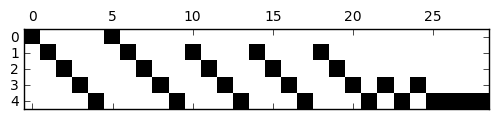

In [6]:
plt.spy(C);
plt.show();

In [7]:
p = np.array(bond_df['dirty price'])
z = np.linalg.pinv(C).dot(p)
print(z)
print('Error=%3.2g' % np.linalg.norm(C.dot(z)-p))

[ 0.01199372  0.0171883   0.00941718  0.00666699  0.02407784  1.02199143
  0.0171883   0.00941718  0.00666699  0.02407784  0.0171883   0.00941718
  0.00666699  0.02407784  0.0171883   0.00941718  0.00666699  0.02407784
  1.07493015  1.01391639  0.00666699  0.02407784  0.00666699  0.02407784
  0.97641116  0.02407784  0.02407784  0.02407784  1.19148811]
Error=4.7e-14


In [8]:
#! pip install quadprog